In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/iris.csv')

In [3]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
attr1 = 'petal.length'
attr2 = 'petal.width'

In [5]:
df = df[[attr1, attr2, 'variety']]

In [6]:
X = df[[attr1, attr2]]
y = df['variety']

In [7]:
X.head()

,petal.length,petal.width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [8]:
y_np = np.array(y)
y_np.shape

(150,)

In [9]:
variety = df['variety'].unique()
n_classes = len(variety)

In [10]:
changes = dict(zip(variety, range(n_classes)))

In [11]:
changes

{'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}

In [12]:
y = y.replace(changes)

In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: variety, dtype: int64

## Algoritam stablo odlučivanja
Stablo odlučivanja predstavlja jedan od poznatijih modela mašinskog učenja i može se koristiti
u problemima regresija i klasifikacije.

Odnosna ideja je doći do skupa pravila pomoću kojih se dolazi do odgovora na postavljeni problem, pri čemu
su pravila organizovana u stablo.

Više o stablima odlučivanja možete pronaći [ovde](https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb).
<img src='tree.png'>

In [14]:
clf = DecisionTreeClassifier(criterion='gini')

In [15]:
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.3, stratify=y, random_state=7)

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
clf.score(X_train, y_train)

0.9904761904761905

In [18]:
clf.score(X_test, y_test)

0.9333333333333333

In [19]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [20]:
conf = metrics.confusion_matrix(y_test, y_test_pred)
conf

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 13]])

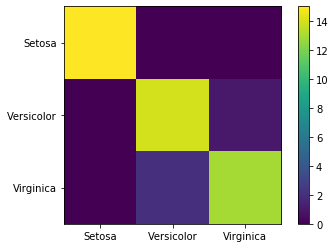

In [21]:
plt.imshow(conf)
plt.colorbar()
plt.xticks(range(n_classes), changes.keys())
plt.yticks(range(n_classes), changes.keys())
plt.show()

In [22]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

